<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Data Science Immersive Project 1: Impact of Adverse Weather Conditions on Singapore's Tourism Industry

## **Background**

According to a [<span style="background-color: light blue">CNA Article</span>](https://www.channelnewsasia.com/singapore/sg-tourists-climate-change-heat-sea-level-rise-warmer-weather-ecotourism-green-4050806), a warmer and wetter Singapore could affect the tourism industry in years to come. As an analytst in the joint task force between National Environmental Agency (NEA) and Singapore Tourism Board (STB), the task is to assess the impact of high rainfall and temperature on the tourism industry.

## **Datasets**

### Weather Datasets:
- [<span style="background-color: light blue">RainfallMonthlyNumberofRainDays.csv</span>](https://beta.data.gov.sg/collections/1398/view)*: The number of rain days (day with rainfall amount of 0.2mm or more) in a month recorded at the Changi Climate Station
- [<span style="background-color: light blue">RainfallMonthlyTotal.csv</span>](https://beta.data.gov.sg/collections/1399/view)*: The total monthly rainfall recorded at the Changi Climate Station
- [<span style="background-color: light blue">RainfallMonthlyHighestDailyTotal.csv</span>](https://beta.data.gov.sg/collections/1397/view): The highest daily total rainfall for the month recorded at the Changi Climate Station
- [<span style="background-color: light blue">SunshineDurationMonthlyMeanDailyDuration.csv</span>](https://beta.data.gov.sg/collections/1417/view): The monthly mean sunshine hours in a day recorded at the Changi Climate Station
- [<span style="background-color: light blue">SurfaceAirTemperatureMonthlyMean.csv</span>](https://beta.data.gov.sg/collections/1419/view): The monthly mean air temperature recorded at the Changi Climate Station
- [<span style="background-color: light blue">WetBulbTemperatureHourly.csv</span>](https://beta.data.gov.sg/collections/1423/view): The hourly wet bulb temperature recorded at the Changi Climate Station
- [<span style="background-color: light blue">RelativeHumidityMonthlyMean.csv</span>](https://beta.data.gov.sg/collections/1404/view): The monthly mean relative humidity recorded at the Changi Climate Station.
##### _*Datasets used were downloaded from data.gov.sg instead of the ones provided. This is so that the latest months of data are available._

### Tourism Datasets:
- [<span style="background-color: light blue">hotelstatistics-table.csv</span>](https://tablebuilder.singstat.gov.sg/table/TS/M550081): Monthly hotel statistics on revenue and occupancy rate
- [<span style="background-color: light blue">visitordays-table.csv</span>](https://tablebuilder.singstat.gov.sg/table/TS/M550281): Number Of Visitor Days, (At End Of Period)
- [<span style="background-color: light blue">outbounddeparturesingaporeresidents-table.csv</span>](https://tablebuilder.singstat.gov.sg/table/TS/M650661): Outbound Departures Of Singapore Residents By Mode Of Transport
- [<span style="background-color: light blue">internationalvisitorarrivals-table.csv</span>](https://tablebuilder.singstat.gov.sg/table/TS/M550001): Total International Visitor Arrivals By Inbound Tourism Markets

## **Data Import, Cleaning and Processing**

### Handling of Weather Datasets

Import all required packages

In [179]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime as dt
import calendar as cal

Import all weather datasets and create function to trim, replace ` ` with `-` and set lowercase for all column names in dataframe.

In [180]:
def tidy_cols(df):
    df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

# Read in data file and parse month as datetime64
num_rain_days = pd.read_csv('data/RainfallMonthlyNumberofRainDays.csv', parse_dates=['month'])
tidy_cols(num_rain_days)

Next, create a data field `'rainy_month'` to indicate if a particular month is a rainy month.
- Count total number of days for every month
- Divide number of rainy days by total number of days for every month
- If >= 0.5 to consider the month a rainy month and set value to 1. Else, set to 0.

In [181]:
# Extract the number of days in each month
num_rain_days['days_in_month'] = num_rain_days['month'].dt.days_in_month
num_rain_days['rainy_proportion'] = num_rain_days['no_of_rainy_days']/num_rain_days['days_in_month']
num_rain_days['rainy_month'] = num_rain_days['rainy_proportion'].apply(lambda x: 1 if x >= 0.5 else 0)
num_rain_days.head(10)

,month,no_of_rainy_days,days_in_month,rainy_proportion,rainy_month
0,1982-01-01,10,31,0.32,0
1,1982-02-01,5,28,0.18,0
2,1982-03-01,11,31,0.35,0
3,1982-04-01,14,30,0.47,0
4,1982-05-01,10,31,0.32,0
5,1982-06-01,8,30,0.27,0
6,1982-07-01,8,31,0.26,0
7,1982-08-01,11,31,0.35,0
8,1982-09-01,9,30,0.30,0
9,1982-10-01,10,31,0.32,0


In [182]:
# Drop intermediary columns
num_rain_days.drop(columns=['days_in_month', 'rainy_proportion'], inplace=True)

num_rain_days.info()
print("\n")
num_rain_days.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   month             504 non-null    datetime64[ns]
 1   no_of_rainy_days  504 non-null    int64         
 2   rainy_month       504 non-null    int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 11.9 KB




,month,no_of_rainy_days,rainy_month
0,1982-01-01,10,0
1,1982-02-01,5,0
2,1982-03-01,11,0
3,1982-04-01,14,0
4,1982-05-01,10,0


In [183]:
# Do the same for the remaining weather datasets and check that data types for all columns are correct
rain_total = pd.read_csv('data/RainfallMonthlyTotal.csv', parse_dates=['month'])
tidy_cols(rain_total)
rain_total.info()
print("\n")

rain_max = pd.read_csv('data/RainfallMonthlyHighestDailyTotal.csv', parse_dates=['month'])
tidy_cols(rain_max)
rain_max.info()
print("\n")

sun_dur = pd.read_csv('data/SunshineDurationMonthlyMeanDailyDuration.csv', parse_dates=['month'])
tidy_cols(sun_dur)
sun_dur.info()
print("\n")

surface_air_temp = pd.read_csv('data/SurfaceAirTemperatureMonthlyMean.csv', parse_dates=['month'])
tidy_cols(surface_air_temp)
surface_air_temp.info()
print("\n")

humid_mean = pd.read_csv('data/RelativeHumidityMonthlyMean.csv', parse_dates=['month'])
tidy_cols(humid_mean)
humid_mean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   month           504 non-null    datetime64[ns]
 1   total_rainfall  504 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 8.0 KB


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 2 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   month                      504 non-null    datetime64[ns]
 1   maximum_rainfall_in_a_day  504 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 8.0 KB


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----      

As `WetBulbTemperatureHourly.csv` is a hourly dataset, `'web_bulb_temperature'` will be aggregated monthly by taking the mean to align with other datasets.

a) Firstly, check that there are no missing values in `'web_bulb_temperature'` and `'wbt_date'`.

In [184]:
wet_bulb_temp_hr = pd.read_csv('data/WetBulbTemperatureHourly.csv', parse_dates=['wbt_date'])
wet_bulb_temp_hr[['wet_bulb_temperature', 'wbt_date']].isnull().sum()

wet_bulb_temperature    0
wbt_date                0
dtype: int64

b) Rename colum name from `'wbt_date'` to `'month'`.

In [185]:
wet_bulb_temp_hr.rename(columns={'wbt_date': 'month'}, inplace=True)

c) Perform a groupby operation on `'month'` by calculating the mean of `'web_bulb_temperature'`.

In [186]:
avg_wet_bulb_temp_mth = pd.DataFrame(wet_bulb_temp_hr.groupby('month')['wet_bulb_temperature'].mean()).reset_index()
tidy_cols(avg_wet_bulb_temp_mth)
avg_wet_bulb_temp_mth.info()
print("\n")
avg_wet_bulb_temp_mth.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15340 entries, 0 to 15339
Data columns (total 2 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   month                 15340 non-null  datetime64[ns]
 1   wet_bulb_temperature  15340 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 239.8 KB




,month,wet_bulb_temperature
0,1982-01-01,24.23
1,1982-01-02,24.04
2,1982-01-03,24.29
3,1982-01-04,24.33
4,1982-01-05,23.95


Combine all weather datasets into a single dataframe and check for missing values. Since all datasets has the same range of months, the type of join doesn't matter.

In [187]:
weather_df = pd.merge(num_rain_days, rain_total, on='month').merge(rain_max, on='month').merge(sun_dur, on='month').merge(surface_air_temp, on='month').merge(avg_wet_bulb_temp_mth, on='month').merge(humid_mean, on='month')
weather_df.isnull().sum()

month                        0
no_of_rainy_days             0
rainy_month                  0
total_rainfall               0
maximum_rainfall_in_a_day    0
mean_sunshine_hrs            0
mean_temp                    0
wet_bulb_temperature         0
mean_rh                      0
dtype: int64

### Handling of Tourism Datasets

Due to the unique structure of the tourism datasets csv files, there is a need to perform the following processing steps:
- Skip reading the first n rows while treating the n+1 row to be the column names of the dataframe. n differs for each dataset unfortunately...
- Remove footnotes
- Convert format of `'month'` from `2023 Nov` to `YYYY-MM-DD` for alignment with weather datasets

In [188]:
# Import tourism datasets while specifying header row and rows to be skipped
hotel_stat = pd.read_csv('data/hotelstatistics-table.csv', skiprows=range(1, 10), header=1)

# Create a function to remove footnotes and convert format 
def tourism_proc(df, date_col):
    # Find minimum row index where nan value is first observed
    nan_index = df[df[date_col].isna()].index.min()
    # Remove all rows from that index onwards (i.e. remove footnotes)
    df.drop(index=range(nan_index, len(df)), inplace = True)
    # Change yearmonth format to YYYY-MM-DD
    df[date_col] = df[date_col].str.strip()
    df[date_col] = pd.to_datetime(df[date_col])
    df.rename(columns={date_col: 'month'}, inplace=True)
    # Trim column names, replace blank space with _ and change all to lowercase
    df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

tourism_proc(hotel_stat, 'Data Series')
# As hotel room revenue is in thousands, to multiply by a factor of 1000. This is also to align with standard average room rate which is presented in dollars.
hotel_stat['hotel_room_revenue'] = hotel_stat['hotel_room_revenue']*1000
# Remove brackets and change - to _. This is done outside of the function as not all dataframes require this
hotel_col = hotel_stat.columns
result = [col.replace('(', '').replace(')', '').replace('-', '_') for col in hotel_col]
hotel_stat.columns = result
# Check that output is correct and footnote is removed
hotel_stat.info()
print("\n")
hotel_stat.tail(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 191 entries, 0 to 190
Data columns (total 6 columns):
 #   Column                                 Non-Null Count  Dtype         
---  ------                                 --------------  -----         
 0   month                                  191 non-null    datetime64[ns]
 1   hotel_room_revenue                     191 non-null    float64       
 2   standard_average_room_rate             191 non-null    float64       
 3   standard_average_hotel_occupancy_rate  191 non-null    float64       
 4   gross_lettings_room_nights             191 non-null    float64       
 5   available_room_nights                  191 non-null    float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 9.1 KB




,month,hotel_room_revenue,standard_average_room_rate,standard_average_hotel_occupancy_rate,gross_lettings_room_nights,available_room_nights
186,2008-05-01,180126800.00,244.20,81.10,730766.00,900704.00
187,2008-04-01,184276300.00,251.60,83.00,722829.00,870588.00
188,2008-03-01,187570500.00,237.20,86.30,779884.00,903456.00
189,2008-02-01,171955100.00,254.30,79.00,667755.00,845049.00
190,2008-01-01,176098300.00,235.90,84.20,745964.00,886159.00


In [189]:
visit_days = pd.read_csv('data/visitordays-table.csv', skiprows=range(1, 9), header=1)
tourism_proc(visit_days, 'Data Series')
# Tidy column names
visit_col = visit_days.columns
result = [col.replace('(', '').replace(')', '').replace('-', '_') for col in visit_col]
visit_days.columns = result
visit_days.info()
print("\n")

depart_res = pd.read_csv('data/outbounddeparturesingaporeresidents-table.csv', skiprows=range(1, 9), header=1)
tourism_proc(depart_res, 'Data Series')
# Tidy up column names
depart_col = depart_res.columns
result = [col.replace('_->', '').replace('_(number)', '_departure') for col in depart_col]
depart_res.columns = result
depart_res.info()
print("\n")

iva = pd.read_csv('data/internationalvisitorarrivals-table.csv', skiprows=range(1, 9), header=1)
tourism_proc(iva, 'Data Series')
# Tidy up column names
iva_col = iva.columns
result = [col.replace('international_visitor_arrivals_by_inbound_tourism_markets_->_', 'IVA_').replace('_(number)', '').replace('international_visitor_arrivals', 'IVA') for col in iva_col]
iva.columns = result
iva.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 191 entries, 0 to 190
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   month                191 non-null    datetime64[ns]
 1   visitor_days_number  191 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 3.1 KB


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   month                155 non-null    datetime64[ns]
 1   total_departure      155 non-null    float64       
 2   total_air_departure  155 non-null    float64       
 3   total_sea_departure  155 non-null    float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 5.0 KB


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 551 entries, 0 to 550
Data columns (total 12 colum

From the result above, data types for `'total_IVA_greater_china'` and `'total_IVA_north_asia '` are object, which doesn't make sense. To investigate, print out a list of unique non-numerical values from these 2 columns.

In [190]:
set(iva['total_IVA_greater_china'][iva['total_IVA_greater_china'].apply(lambda x: pd.to_numeric(x, errors='coerce')).isna()].tolist())

{'na'}

In [191]:
set(iva['total_IVA_north_asia'][iva['total_IVA_north_asia'].apply(lambda x: pd.to_numeric(x, errors='coerce')).isna()].tolist())

{'na'}

Since the string values are `'na'` that represent missing values, replace them with `np.nan`.

In [192]:
iva['total_IVA_greater_china'] = iva['total_IVA_greater_china'].replace('na', np.nan)
iva['total_IVA_north_asia'] = iva['total_IVA_north_asia'].replace('na', np.nan)

Lastly, change the datatype of `'Total IVA Greater China Arrival'` and `'Total IVA North Asia Arrival'` to float.

In [193]:
iva['total_IVA_greater_china'] = iva['total_IVA_greater_china'].astype(float)
iva['total_IVA_north_asia'] = iva['total_IVA_north_asia'].astype(float)
iva.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 551 entries, 0 to 550
Data columns (total 12 columns):
 #   Column                                Non-Null Count  Dtype         
---  ------                                --------------  -----         
 0   month                                 551 non-null    datetime64[ns]
 1   total_IVA_by_inbound_tourism_markets  551 non-null    float64       
 2   total_IVA_southeast_asia              551 non-null    float64       
 3   total_IVA_greater_china               215 non-null    float64       
 4   total_IVA_north_asia                  215 non-null    float64       
 5   total_IVA_south_asia                  551 non-null    float64       
 6   total_IVA_west_asia                   551 non-null    float64       
 7   total_IVA_americas                    551 non-null    float64       
 8   total_IVA_europe                      551 non-null    float64       
 9   total_IVA_oceania                     551 non-null    float64       
 10  to

### Merging of Weather and Tourism Datasets

Combine all weather datasets into a single dataframe and check for missing values. Since all datasets have different ranges of months, perform an outer join instead.

In [194]:
tourism_df = pd.merge(hotel_stat, visit_days, on='month', how='outer').merge(depart_res, on='month', how='outer').merge(iva, on='month', how='outer')
tourism_df.info()
print("\n")
tourism_df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 551 entries, 0 to 550
Data columns (total 21 columns):
 #   Column                                 Non-Null Count  Dtype         
---  ------                                 --------------  -----         
 0   month                                  551 non-null    datetime64[ns]
 1   hotel_room_revenue                     191 non-null    float64       
 2   standard_average_room_rate             191 non-null    float64       
 3   standard_average_hotel_occupancy_rate  191 non-null    float64       
 4   gross_lettings_room_nights             191 non-null    float64       
 5   available_room_nights                  191 non-null    float64       
 6   visitor_days_number                    191 non-null    float64       
 7   total_departure                        155 non-null    float64       
 8   total_air_departure                    155 non-null    float64       
 9   total_sea_departure                    155 non-null    float64   

,month,hotel_room_revenue,standard_average_room_rate,standard_average_hotel_occupancy_rate,gross_lettings_room_nights,available_room_nights,visitor_days_number,total_departure,total_air_departure,total_sea_departure,...,total_IVA_southeast_asia,total_IVA_greater_china,total_IVA_north_asia,total_IVA_south_asia,total_IVA_west_asia,total_IVA_americas,total_IVA_europe,total_IVA_oceania,total_IVA_africa,total_IVA_others
0,2023-11-01,408802500.00,277.40,79.00,1472456.00,1864330.00,3759261.00,1036448.00,895327.00,141121.00,...,418062.00,150216.00,84155.00,109955.00,10698.00,80022.00,141358.00,100963.00,4995.00,35.00
1,2023-10-01,411839400.00,278.40,77.80,1478676.00,1900715.00,4001195.00,777270.00,670281.00,106989.00,...,434922.00,177879.00,83818.00,114670.00,11379.00,60725.00,132679.00,104603.00,5233.00,46.00
2,2023-09-01,493454500.00,326.10,82.60,1512613.00,1831205.00,4131748.00,783624.00,652970.00,130654.00,...,404104.00,188758.00,94298.00,100567.00,13928.00,62765.00,137745.00,122983.00,5582.00,30.00
3,2023-08-01,455909300.00,286.90,85.90,1587706.00,1849140.00,5253808.00,656424.00,548191.00,108233.00,...,429650.00,289814.00,130642.00,104652.00,19790.00,62995.00,173126.00,95791.00,6130.00,65.00
4,2023-07-01,485797600.00,293.00,89.90,1642823.00,1826711.00,5422952.00,636036.00,519196.00,116840.00,...,519036.00,309869.00,103861.00,114733.00,22773.00,81637.00,144825.00,116877.00,5926.00,104.00


Check the min and max months of the combined weather and tourism datasets to determine the type of joins to perform.

In [195]:
print('Weather')
print(weather_df['month'].min())
print(weather_df['month'].max())
print('Tourism')
print(tourism_df['month'].min())
print(tourism_df['month'].max())

Weather
1982-01-01 00:00:00
2023-12-01 00:00:00
Tourism
1978-01-01 00:00:00
2023-11-01 00:00:00


### Since the analysis is to understand the impact of weather conditions (rain/temp/...) on tourism, do a left join with weather datasets as a base.
Create new fields `'month_only'` and `'year_only'` to capture the month and year components of `'month'`.

In [196]:
merged_df = pd.merge(weather_df, tourism_df, how='left', on='month')
merged_df['month_only'] = merged_df['month'].dt.month.astype(str)
# Mapping dictionary for month names
month_name_mapping = {
    '1': 'January',
    '2': 'February',
    '3': 'March',
    '4': 'April',
    '5': 'May',
    '6': 'June',
    '7': 'July',
    '8': 'August',
    '9': 'September',
    '10': 'October',
    '11': 'November',
    '12': 'December'
}

# Use apply to map numeric months to month names
merged_df['month_only'] = merged_df['month_only'].apply(lambda x: month_name_mapping[x])
merged_df['year'] = merged_df['month'].dt.year.astype(str)

In [197]:
merged_df.info()
merged_df.head(100)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 504 entries, 0 to 503
Data columns (total 31 columns):
 #   Column                                 Non-Null Count  Dtype         
---  ------                                 --------------  -----         
 0   month                                  504 non-null    datetime64[ns]
 1   no_of_rainy_days                       504 non-null    int64         
 2   rainy_month                            504 non-null    int64         
 3   total_rainfall                         504 non-null    float64       
 4   maximum_rainfall_in_a_day              504 non-null    float64       
 5   mean_sunshine_hrs                      504 non-null    float64       
 6   mean_temp                              504 non-null    float64       
 7   wet_bulb_temperature                   504 non-null    float64       
 8   mean_rh                                504 non-null    float64       
 9   hotel_room_revenue                     191 non-null    float64   

,month,no_of_rainy_days,rainy_month,total_rainfall,maximum_rainfall_in_a_day,mean_sunshine_hrs,mean_temp,wet_bulb_temperature,mean_rh,hotel_room_revenue,...,total_IVA_north_asia,total_IVA_south_asia,total_IVA_west_asia,total_IVA_americas,total_IVA_europe,total_IVA_oceania,total_IVA_africa,total_IVA_others,month_only,year
0,1982-01-01,10,0,107.10,36.50,5.60,25.90,24.23,81.20,NaN,...,NaN,14148.00,3687.00,12654.00,37600.00,32964.00,1570.00,327.00,January,1982
1,1982-02-01,5,0,27.80,9.40,7.60,27.10,24.61,79.50,NaN,...,NaN,14520.00,3366.00,15162.00,37046.00,21465.00,1112.00,433.00,February,1982
2,1982-03-01,11,0,160.80,61.70,5.10,27.20,25.03,82.30,NaN,...,NaN,13847.00,3924.00,15901.00,39669.00,25585.00,922.00,164.00,March,1982
3,1982-04-01,14,0,157.00,45.10,4.70,27.00,25.61,85.90,NaN,...,NaN,13555.00,3690.00,16164.00,35613.00,24377.00,955.00,151.00,April,1982
4,1982-05-01,10,0,102.20,33.00,5.80,28.00,24.98,83.20,NaN,...,NaN,17101.00,3222.00,17131.00,30016.00,27511.00,868.00,196.00,May,1982
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1989-12-01,18,1,179.70,44.20,4.80,26.30,23.40,85.50,NaN,...,NaN,28539.00,6777.00,24963.00,77549.00,46904.00,5895.00,326.00,December,1989
96,1990-01-01,13,0,147.40,73.90,5.30,26.20,24.40,83.80,NaN,...,NaN,25729.00,8267.00,26239.00,80348.00,54535.00,4921.00,359.00,January,1990
97,1990-02-01,8,0,24.10,6.60,8.90,27.60,24.43,80.90,NaN,...,NaN,23867.00,7019.00,28824.00,83498.00,36397.00,3644.00,285.00,February,1990
98,1990-03-01,4,0,94.20,48.60,8.30,28.20,24.15,77.60,NaN,...,NaN,26993.00,8604.00,30833.00,91132.00,40173.00,4089.00,220.00,March,1990


## **Data Dictionary**

|Feature|Type|Dataset|Description|
|---|---|---|---|
|**month**|*date*|All|Year month| 
|**month_only**|*object*|All|Month component of `'month'`|
|**year_only**|*object*|All|Year component of `'month'`| 
|**no_of_rainy_days**|*integer*|RainfallMonthlyNumberofRainDays|Number of rain days (day with rainfall amount of 0.2mm or more) in a month recorded at the Changi Climate Station|
|**rainy_month**|*integer*|Derived|Binary indicator to determine if a specific month is rainy, computed by taking no_of_rainy_days and dividing by the total number of days for that month. Value is 1 if result is >= 0.5, else 0.|
|**total_rainfall**|*float*|RainfallMonthlyTotal|Total monthly rainfall (in mm) recorded at the Changi Climate Station|
|**maximum_rainfall_in_a_day**|*float*|RainfallMonthlyHighestDailyTotal|The highest daily total rainfall (in mm) for the month recorded at the Changi Climate Station)|
|**mean_sunshine_hrs**|*float*|SunshineDurationMonthlyMeanDailyDuration|The monthly mean sunshine hours in a day recorded at the Changi Climate Station|
|**mean_temp**|*float*|SurfaceAirTemperatureMonthlyMean|The monthly mean air temperature (in °C) recorded at the Changi Climate Station|
|**wet_bulb_temperature**|*float*|WetBulbTemperatureHourly|The hourly wet bulb temperature (in °C) recorded at the Changi Climate Station|
|**mean_rh**|*float*|RelativeHumidityMonthlyMean|The monthly mean relative humidity (in %) recorded at the Changi Climate Station|
|**hotel_room_revenue**|*float*|hotelstatistics-table|Total hotel room revenue (in dollars)|
|**standard_average_room_rate**|*float*|hotelstatistics-table|Standard average room rates (in dollars) calculated from total room revenue divided by gross lettings.|
|**standard_average_hotel_occupancy_rate**|*float*|hotelstatistics-table|Standard average hotel occupancy rates (in %) calcualted from gross lettings (room nights) divided by available room-nights.|
|**gross_lettings_room_nights**|*float*|hotelstatistics-table|Gross lettings of room nights|
|**available_room_nights**|*float*|hotelstatistics-table|room-nights available for occupancy. Excludes rooms closed for renovations and staff use as declared by the hotels in the statutory forms.|
|**visitor_days_number**|*float*|visitordays-table|Total number of visitor days|
|**total_departure**|*float*|outbounddeparturesingaporeresidents-table|Total outbound departure of Singapore Residents.|
|**total_air_departure**|*float*|outbounddeparturesingaporeresidents-table|Total outbound departure of Singapore Residents by air.|
|**total_sea_departure**|*float*|outbounddeparturesingaporeresidents-table|Total outbound departure of Singapore Residents by sea.|
|**total_IVA_by_inbound_tourism_markets**|*float*|outbounddeparturesingaporeresidents-table|Total International Visitor Arrivals By Inbound Tourism Markets. Excludes arrivals of Malaysians by land.|
|**total_IVA_by_XXX**|*float*|outbounddeparturesingaporeresidents-table|Total International Visitor Arrivals from specific regions. Excludes arrivals of Malaysians by land.|

Caveats:
- Due to the presence of irrelevant headers and footnotes in the tourism datasets, certain data fields are imported as floats instead of integers. This is not corrected as it does not impact the EDA at all.
- Not all data fields listed above will be used for the EDA.

## **Exploratory Data Analysis**

Let's begin by generating descriptive statistics for the entire dataset.

In [198]:
merged_df.describe()

,no_of_rainy_days,rainy_month,total_rainfall,maximum_rainfall_in_a_day,mean_sunshine_hrs,mean_temp,wet_bulb_temperature,mean_rh,hotel_room_revenue,standard_average_room_rate,...,total_IVA_southeast_asia,total_IVA_greater_china,total_IVA_north_asia,total_IVA_south_asia,total_IVA_west_asia,total_IVA_americas,total_IVA_europe,total_IVA_oceania,total_IVA_africa,total_IVA_others
count,504.00,504.00,504.00,504.00,504.00,504.00,504.00,504.00,191.00,191.00,...,503.00,215.00,215.00,503.00,503.00,503.00,503.00,503.00,503.00,503.00
mean,14.14,0.42,178.17,52.55,5.67,27.69,25.22,82.10,250420982.20,219.87,...,254146.95,193962.95,85343.26,56483.73,7705.10,37342.89,90882.76,58382.12,5277.66,334.46
std,4.98,0.49,113.01,35.62,1.21,0.81,0.75,3.50,96941712.51,39.22,...,164197.83,122761.80,39516.88,40500.92,4850.35,17826.44,43508.11,31556.67,2707.29,821.81
min,1.00,0.00,0.20,0.20,2.70,25.40,21.77,72.00,33441700.00,64.50,...,503.00,29.00,34.00,19.00,6.00,13.00,47.00,14.00,1.00,0.00
25%,11.00,0.00,96.75,31.00,4.80,27.10,24.78,79.80,179267950.00,210.55,...,120077.00,118245.50,70284.00,26782.50,4334.50,26202.50,67190.00,35360.00,3947.00,7.50
50%,14.00,0.00,160.10,44.10,5.70,27.70,25.26,82.55,276940400.00,225.10,...,205538.00,177879.00,94290.00,37722.00,6135.00,36483.00,88543.00,48764.00,5593.00,47.00
75%,18.00,1.00,239.65,63.23,6.43,28.30,25.69,84.60,312876650.00,238.65,...,385513.50,289030.50,112828.00,85592.50,10675.00,46420.50,113902.00,83620.00,6976.00,220.50
max,27.00,1.00,765.90,216.20,9.30,29.50,26.99,90.70,493454500.00,326.10,...,662907.00,499809.00,173762.00,218406.00,27567.00,100218.00,225192.00,148055.00,16335.00,6583.00


Next, let's examine the cumulative rainfall in Singapore throughout the years

In [199]:
merged_df[['month', 'total_rainfall']].sort_values(by='total_rainfall', ascending=False).head(10)

,month,total_rainfall
299,2006-12-01,765.90
468,2021-01-01,692.80
239,2001-12-01,609.00
264,2004-01-01,600.90
60,1987-01-01,568.60
348,2011-01-01,513.20
94,1989-11-01,508.40
131,1992-12-01,502.70
11,1982-12-01,494.10
119,1991-12-01,492.30


It seems like high rainfalls are mainly observed in the months of November/December/January regardless of years. Let's validate our observation below.

In [200]:
merged_df.groupby(['month_only'])['total_rainfall'].mean().reset_index().sort_values(by='total_rainfall', ascending=False)

,month_only,total_rainfall
2,December,307.47
9,November,256.66
4,January,235.92
8,May,164.95
7,March,162.87
10,October,161.02
0,April,160.01
1,August,148.58
5,July,147.64
11,September,146.32


December, November and January have the highest total rainfall, irregardless of years.

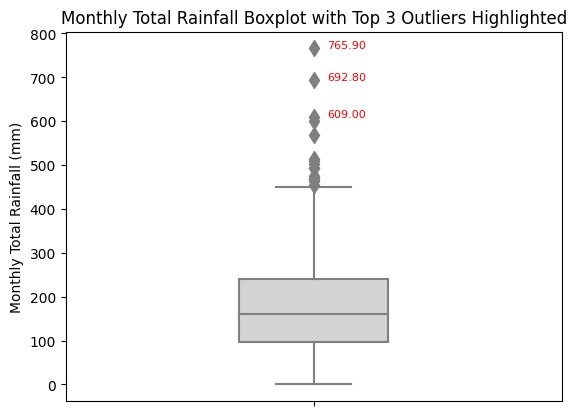

In [201]:
# Boxplot for total rainfall with top 3 outliers highlighted
boxplot = sns.boxplot(y='total_rainfall', data=merged_df, color='lightgray', width=0.3, fliersize=8)

# Add title and labels
plt.title('Monthly Total Rainfall Boxplot with Top 3 Outliers Highlighted')
plt.ylabel('Monthly Total Rainfall (mm)')

# Get the indices of the top 3 outliers
top3_outliers_indices = merged_df['total_rainfall'].nlargest(3).index

# Annotate the top 3 outliers
for i in top3_outliers_indices:
    boxplot.annotate(f'{merged_df["total_rainfall"][i]:.2f}',
                     xy=(0, merged_df['total_rainfall'][i]),
                     xytext=(10, 0),
                     textcoords='offset points',
                     ha='left',
                     fontsize=8,
                     color='red')
plt.show()

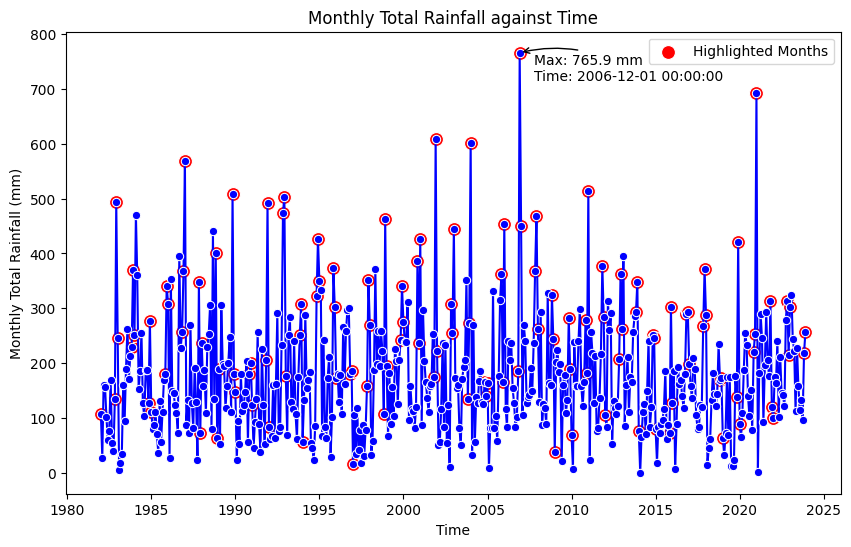

In [202]:
plt.figure(figsize=(10, 6))

# Line plot for total rainfall
sns.lineplot(x='month', y='total_rainfall', data=merged_df, marker='o', color='b')

# Find the index of the maximum value in the 'total_rainfall' column
max_value_index = merged_df['total_rainfall'].idxmax()

# Extract the timestamp of the maximum value
max_rainfall_time = merged_df['month'][max_value_index]

# Annotate the maximum value on the plot
plt.annotate(f'Max: {merged_df["total_rainfall"].max()} mm\nTime: {max_rainfall_time}',
             xy=(max_rainfall_time, merged_df['total_rainfall'].max()),
             xytext=(10, -20),
             textcoords='offset points',
             arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2"))

# Highlight points for November, December, and January
highlight_months = ['November', 'December', 'January']
highlight_points = merged_df[merged_df['month_only'].isin(highlight_months)]

# Plot highlighted points
sns.scatterplot(x='month', y='total_rainfall', data=highlight_points, color='red', s=100, label='Highlighted Months')

plt.title('Monthly Total Rainfall against Time')
plt.xlabel('Time')
plt.ylabel('Monthly Total Rainfall (mm)')
plt.legend()
plt.show()

2 key observations:
- The data points for November, December, and January are highlighted in the plot above. These highlighted points generally align with the peaks observed in the line plot.
- The max total rainfall of 765.9mm happens in Dec 2006. There was a heavy downpour in Dec 2006 that led to traffic jams, floods and mudslides [<span style="background-color: light blue">[source]</span>](http://www.wildsingapore.com/news/20061112/061220-1.htm#cna3). This might have led to disruptions to businesses and negative impacts on the tourism industry. As hotel data is not available for the year 2006, let's look at the number of incoming visitors instead.

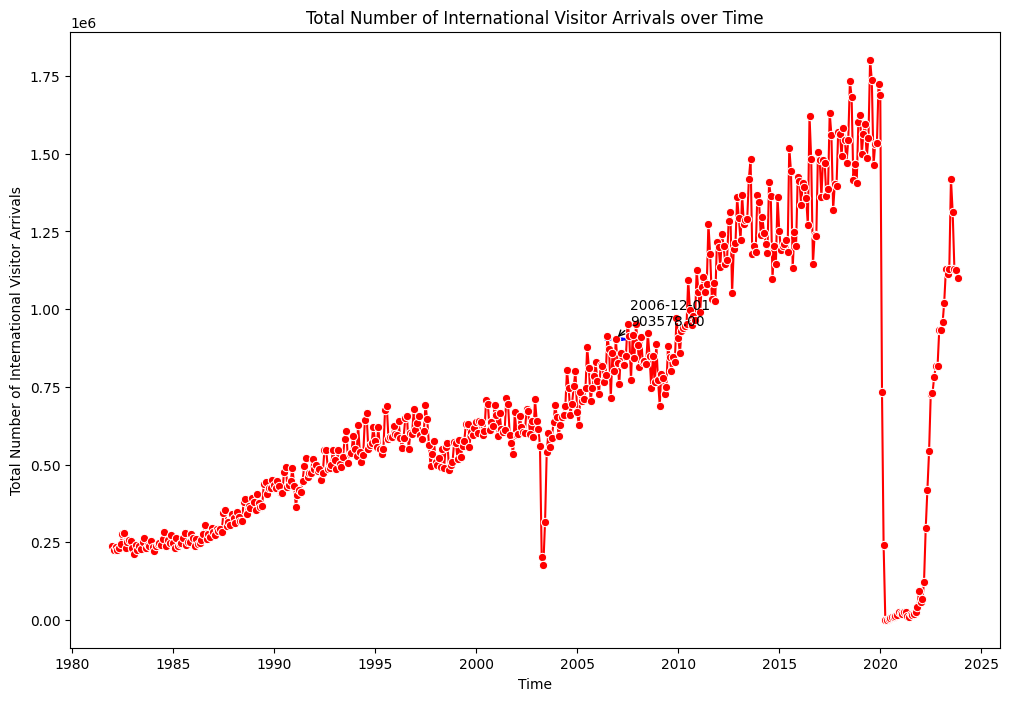

In [203]:
plt.figure(figsize=(12, 8))

# Line plot for hotel room revenue
sns.lineplot(x='month', y='total_IVA_by_inbound_tourism_markets', data=merged_df, marker='o', color='r')

# Specify the month you want to circle
specific_month = '2006-12-01'  # Change this to the desired month

# Find the index corresponding to the specified month
index_to_circle = merged_df.index[merged_df['month'] == pd.to_datetime(specific_month)].tolist()

# Check if the specified month exists in the DataFrame
if index_to_circle:
    index_to_circle = index_to_circle[0]  # Take the first occurrence if multiple
    x_coord = merged_df['month'][index_to_circle]
    y_coord = merged_df['total_IVA_by_inbound_tourism_markets'][index_to_circle]

    # Draw a circle around the specific point
    circle_radius = 200  # You can adjust the radius as needed
    circle = plt.Circle((x_coord, y_coord), circle_radius, color='blue', fill=False, linestyle='dashed', linewidth=2)
    plt.gca().add_patch(circle)

    # Annotate the specific month
    plt.annotate(f'{specific_month}\n{y_coord:.2f}', 
                 xy=(x_coord, y_coord), 
                 xytext=(10, 10),
                 textcoords='offset points',
                 arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2"))
else:
    print(f"The specified month '{specific_month}' does not exist in the DataFrame.")

# Add title and labels
plt.title('Total Number of International Visitor Arrivals over Time')
plt.xlabel('Time')
plt.ylabel('Total Number of International Visitor Arrivals')

# Display the plot
plt.show()

There are 2 keys insights from the above:
- There is a sharp decline in international visitors arrivals (IVA) in 2019 due to COVID-19's travelling restrictions. As travelling restrictions starts to ease, IVA numbers begin to recover as well.

- IVA has been steadily increasing over the years because Singapore is progressively establishing itself as a prominent participant in the global economy. In Dec 2006, a period marked by elevated rainfall, there were 903,578 IVA. This figure, notably high even when compared to adjacent years, implies that high rainfall may not necessarily have an impact on IVA count.

Given that the analysis results could be influenced by the COVID-19 period, which significantly impacts tourism data, let's generate an additional DataFrame specifically for the pre-COVID period. Since COVID begins in late 2019, to only keep data <= Sep 2019.

In [204]:
# To keep data <= 2019-09
merged_df_precovid = merged_df[merged_df['month'] <= '2019-09-01']
merged_df_precovid['month'].max()

Timestamp('2019-09-01 00:00:00')

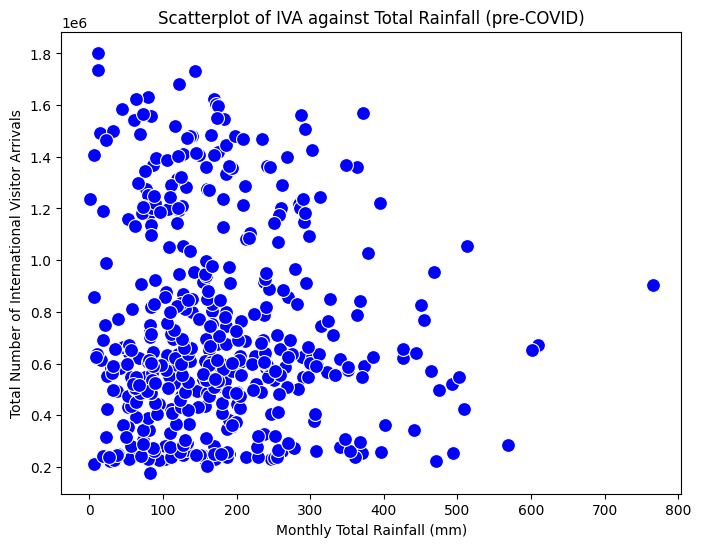

In [205]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='total_rainfall', y='total_IVA_by_inbound_tourism_markets', data=merged_df_precovid, color='blue', marker='o', s=100)
plt.title('Scatterplot of IVA against Total Rainfall (pre-COVID)')
plt.xlabel('Monthly Total Rainfall (mm)')
plt.ylabel('Total Number of International Visitor Arrivals')
plt.show()

The scatterplot above also illustrates that there is no discernible correlation between the Total Rainfall and IVA. This aligns with the idea that the number of international visitor arrivals serves as a more indicative measure of Singapore's economic performance rather than solely reflecting the health of the tourism industry.

Next, let's take a look at the temperature of Singapore over the years and then study the relationships between various data fields from both the weather and tourism datasets.

In [206]:
merged_df[['month', 'mean_temp']].sort_values(by='mean_temp', ascending=False).head(15)

,month,mean_temp
194,1998-03-01,29.50
496,2023-05-01,29.50
196,1998-05-01,29.40
15,1983-04-01,29.40
411,2016-04-01,29.40
448,2019-05-01,29.30
412,2016-05-01,29.30
185,1997-06-01,29.30
184,1997-05-01,29.30
195,1998-04-01,29.20


The highest temperatures are observed in the months of March/April/May. Similar to rainfall, we can validate this as well.

In [207]:
merged_df.groupby(['month_only'])['mean_temp'].mean().reset_index().sort_values(by='mean_temp', ascending=False)

,month_only,mean_temp
8,May,28.51
6,June,28.42
0,April,28.13
5,July,28.09
1,August,27.99
11,September,27.85
10,October,27.80
7,March,27.70
3,February,27.24
9,November,27.16


April, May and June have the highest average mean temperature.

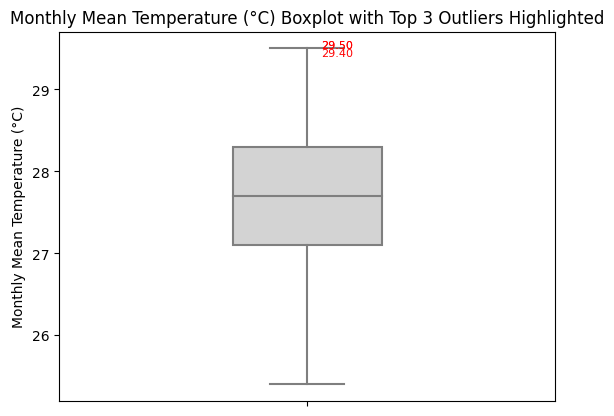

In [208]:
# Boxplot for mean temp with top 3 outliers highlighted
boxplot = sns.boxplot(y='mean_temp', data=merged_df, color='lightgray', width=0.3, fliersize=8)

# Add title and labels
plt.title('Monthly Mean Temperature (°C) Boxplot with Top 3 Outliers Highlighted')
plt.ylabel('Monthly Mean Temperature (°C)')

# Get the indices of the top 3 outliers
top3_outliers_indices = merged_df['mean_temp'].nlargest(3).index

# Annotate the top 3 outliers
for i in top3_outliers_indices:
    boxplot.annotate(f'{merged_df["mean_temp"][i]:.2f}',
                     xy=(0, merged_df['mean_temp'][i]),
                     xytext=(10, 0),
                     textcoords='offset points',
                     ha='left',
                     fontsize=8,
                     color='red')
plt.show()

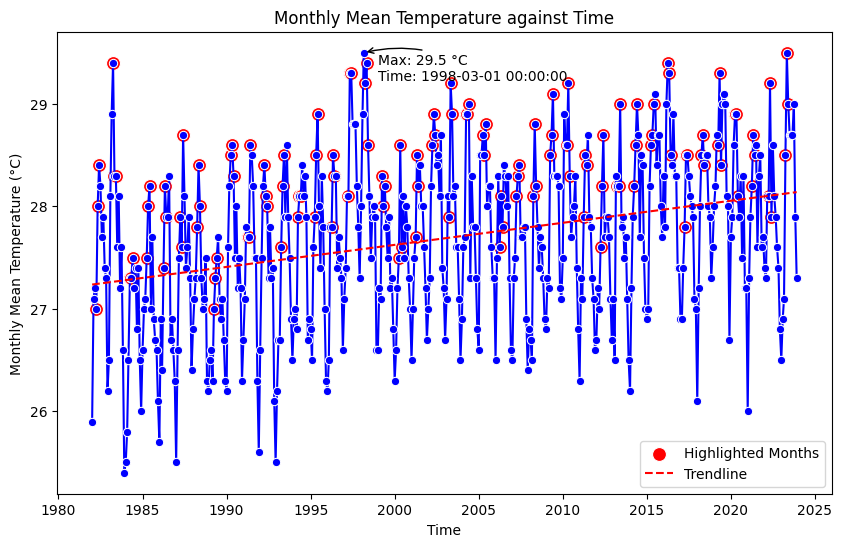

In [209]:
plt.figure(figsize=(10, 6))

# Line plot for mean temperature
sns.lineplot(x='month', y='mean_temp', data=merged_df, marker='o', color='b')

# Calculate the trendline using linear regression
trendline = np.polyfit(merged_df.index.values, merged_df['mean_temp'], 1)
trendline_fn = np.poly1d(trendline)

# Find the index of the maximum value in the 'mean_temp' column
max_value_index = merged_df['mean_temp'].idxmax()

# Extract the timestamp of the maximum value
max_temp_time = merged_df['month'][max_value_index]

# Annotate the maximum value on the plot
plt.annotate(f'Max: {merged_df["mean_temp"].max()} °C\nTime: {max_temp_time}',
             xy=(max_temp_time, merged_df['mean_temp'].max()),
             xytext=(10, -20),
             textcoords='offset points',
             arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2"))

# Highlight points for April, May, and June
highlight_months = ['April', 'May', 'June']
highlight_points = merged_df[merged_df['month_only'].isin(highlight_months)]

# Plot highlighted points
sns.scatterplot(x='month', y='mean_temp', data=highlight_points, color='red', s=100, label='Highlighted Months')

# Plot the trendline
plt.plot(merged_df['month'], trendline_fn(merged_df.index.values), color='r', linestyle='--', label='Trendline')
plt.title('Monthly Mean Temperature against Time')
plt.xlabel('Time')
plt.ylabel('Monthly Mean Temperature (°C)')
plt.legend()
plt.show()

An additional linear regression trendline has been applied in the graph above. Despite potential deviations from linearity assumptions, the trendline visually indicates a gradual upward trend in temperature over the years possibly due to impact of climate change.

The data points for April, May and June are also highlighted in the plot above. These highlighted points generally align with the peaks observed in the line plot but some of them fall below the linear regression trendline as well.

Now, let's look at the pre-COVID non-nan tourism data fields for months with the highest total rainfall and temperature.

In [210]:
merged_df_precovid[['month', 'total_rainfall', 'rainy_month', 'hotel_room_revenue', 'visitor_days_number', 'total_IVA_by_inbound_tourism_markets']]\
    .dropna()\
    .sort_values(by='total_rainfall', ascending=False)\
    .head(10)

,month,total_rainfall,rainy_month,hotel_room_revenue,visitor_days_number,total_IVA_by_inbound_tourism_markets
348,2011-01-01,513.20,1,220511500.00,4062250.00,1055990.00
373,2013-02-01,395.20,1,243203500.00,4187900.00,1221365.00
358,2011-11-01,377.80,1,262033400.00,3773441.00,1027787.00
431,2017-12-01,371.20,1,308692400.00,5061000.00,1569616.00
371,2012-12-01,363.40,1,268803500.00,4532209.00,1360536.00
383,2013-12-01,348.20,1,279971600.00,4740375.00,1367404.00
319,2008-08-01,327.30,1,166743000.00,3674424.00,850016.00
322,2008-11-01,324.30,1,164945100.00,3004656.00,765325.00
362,2012-03-01,313.40,1,266131200.00,4144372.00,1243133.00
407,2015-12-01,302.30,1,289347200.00,4704237.00,1424978.00


In [211]:
pd.set_option('display.float_format', '{:.2f}'.format)
merged_df_precovid[['hotel_room_revenue', 'visitor_days_number', 'total_IVA_by_inbound_tourism_markets']]\
            .agg({'hotel_room_revenue': ['mean', 'median'],
                  'visitor_days_number': ['mean', 'median'],
                  'total_IVA_by_inbound_tourism_markets': ['mean', 'median']})

,hotel_room_revenue,visitor_days_number,total_IVA_by_inbound_tourism_markets
mean,261194700.00,4358313.10,729523.95
median,278802600.00,4390302.00,621277.00


Jan 2011 has the highest total rainfall of 513.2mm, which is 118mm higher than Feb 2013's total rainfall. This difference is also much larger than the differences between other months. For Jan 2011, both `'hotel_room_revenue'` and `'visitor_days_number'` fall below the mean and median, which indicates that exceptionally high rainfall may discourage visitors from coming to Singapore.

For `'total_IVA_by_inbound_tourism_markets'`, all values are much higher than the mean and median. This is because this field contains values that ranges from 1982 till pre-COVID (2019). The top 10 months with the highest rainfall ranges from 2008 - 2017, which are more recent years and IVA increases at a much higher rate in these recent years as compared to the earlier years (i.e. 1980s - 2000s). Hence, looking at `'total_IVA_by_inbound_tourism_markets'` might not be very conclusive.

In [212]:
merged_df_precovid[['month', 'mean_temp', 'hotel_room_revenue', 'visitor_days_number']]\
    .dropna()\
    .sort_values(by='mean_temp', ascending=False)\
    .head(10)

,month,mean_temp,hotel_room_revenue,visitor_days_number
411,2016-04-01,29.40,289765200.00,4650846.00
448,2019-05-01,29.30,306710400.00,5253357.00
412,2016-05-01,29.30,282056900.00,4740850.00
340,2010-05-01,29.20,181294000.00,3782770.00
451,2019-08-01,29.10,383423800.00,6185377.00
329,2009-06-01,29.10,121273200.00,3184048.00
402,2015-07-01,29.10,306594700.00,5458256.00
452,2019-09-01,29.00,375892700.00,4827797.00
450,2019-07-01,29.00,377573200.00,6199953.00
401,2015-06-01,29.00,278802600.00,4560922.00


For months with the highest temperatures in Singapore, values for `'hotel_room_revenue'` and `'visitor_days_number'` are mostly higher than the mean and median. This could be because the months with highest temperatures are generally more recent as compared to months with highest rainfall and  `'hotel_room_revenue'` and `'visitor_days_number'` could be increasing steadily over time. Let's check this intuition out below.

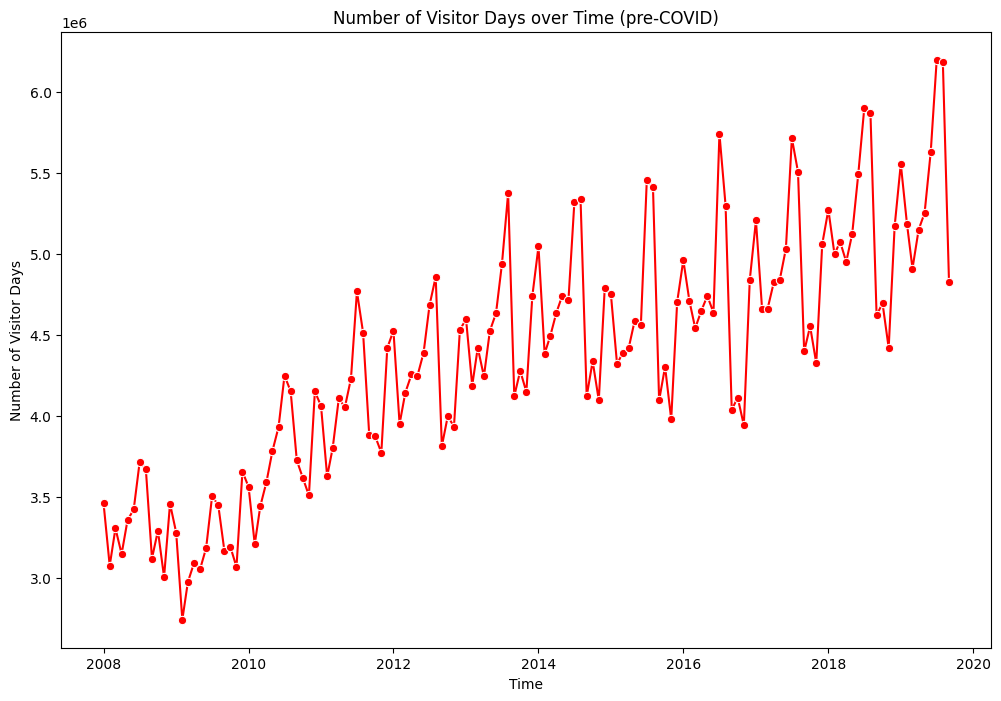

In [213]:
plt.figure(figsize=(12, 8))

# Line plot for hotel room revenue
sns.lineplot(x='month', y='visitor_days_number', data=merged_df_precovid, marker='o', color='r')

# Add title and labels
plt.title('Number of Visitor Days over Time (pre-COVID)')
plt.xlabel('Time')
plt.ylabel('Number of Visitor Days')

# Display the plot
plt.show()

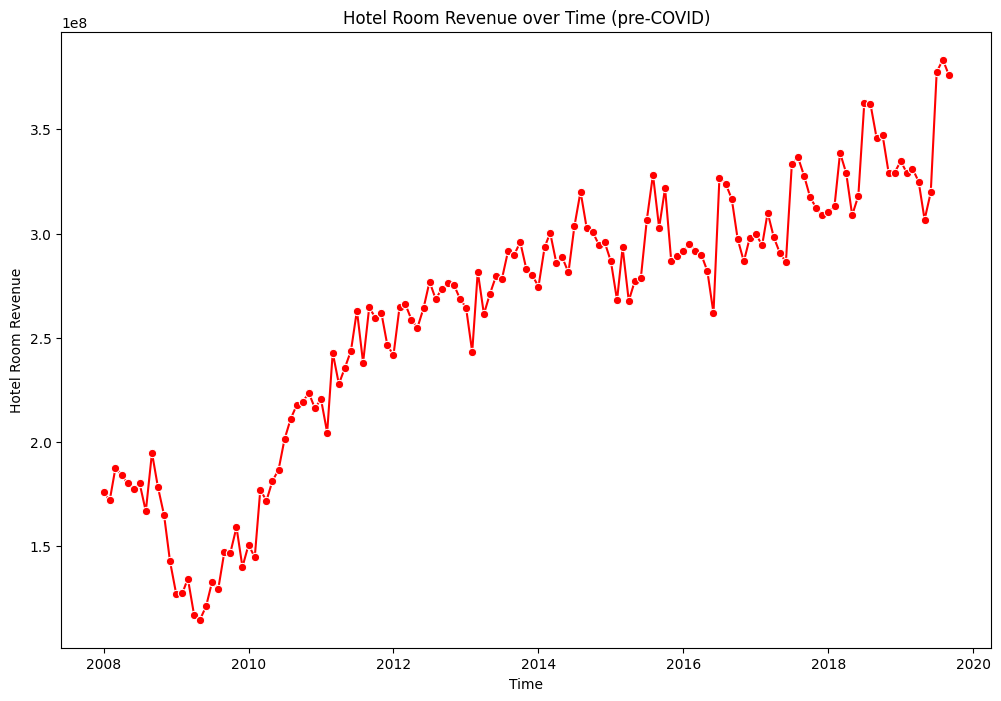

In [214]:
plt.figure(figsize=(12, 8))

# Line plot for hotel room revenue
sns.lineplot(x='month', y='hotel_room_revenue', data=merged_df_precovid, marker='o', color='r')

# Add title and labels
plt.title('Hotel Room Revenue over Time (pre-COVID)')
plt.xlabel('Time')
plt.ylabel('Hotel Room Revenue')

# Display the plot
plt.show()

Bingo! The increase of both metrics suggests that Singapore is advancing significantly in both the tourism sector and the economy. Since this analysis spans over a wide range of years, an additional area we can explore further is to adjust hotel room revenue for inflation using CPI (not stated explicitly in metadata whether it has already been adjusted or not) so that the figures can provide a more accurate representation of real growth or decline. The decline in hotel room revenue from 2008 - 2009 is most likely due to the global financial crisis in 2008. [<span style="background-color: light blue">[Source]</span>](https://en.wikipedia.org/wiki/2007%E2%80%932008_financial_crisis).

From looking at the numerical values of tourism data fields for months with highest rainfall and temperature, there seem to be no apparent relationships or patterns. Even if `'hotel_room_revenue'` and `'visitor_days_number'` are lower than the mean and median on Jan 2011 with the highest rainfall, we are unable to make a conclusive statement as it could be purely coincidental. We will need to take a look at the scatterplots to determine if there are indeed any relationships between rainfall and other tourism fields.

In [ ]:
sns.pairplot(merged_df_precovid[['total_rainfall', 'mean_temp', 'mean_rh', 'rainy_month', 'hotel_room_revenue', 'visitor_days_number', 'total_departure', 'total_IVA_by_inbound_tourism_markets']])
plt.show()

The temperature scatterplots reveal a linear relationship with rainfall and humidity. As temperature increases, humidity and rainfall decreases. There is however a lack of discernible relationships between temperature and the various tourism data fields, as the data points appear to be scattered randomly. This applies to the rainfall scatterplots as well when plotted against tourism data fields. Hence, there is no evidence to conclude that high temperature or rainfall will lead to a decrease in hotel room revenue or number of visitor days.

On a separate note, we can see that there are more non-rainy months than rainy months in Singapore.

In [ ]:
correlation_matrix = merged_df_precovid[['total_rainfall', 'mean_temp', 'mean_rh', 'rainy_month', 'hotel_room_revenue', 'visitor_days_number', 'total_departure', 'total_IVA_by_inbound_tourism_markets']].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Heatmap (pre-COVID)')
plt.show()

Mainly, notable correlations are observed within the weather and tourism datasets separately. For instance, there is a strong correlation between relative humidity, rainfall, temperature and rainy month. This makes sense as humidity is affected by rainfall and temperature although there could be other factors at play, including specific weather patterns, geographical locations and more. Additionally, hotel room revenue exhibits a very strong correlation with the number of visitor days and the number of international visitor arrivals.

There exists a moderate negative correlation between relative humidity and both the number of visitor days and hotel room revenue. This observation might be attributed to the fact that visitors are less inclined to visit or stay in Singapore for too long when the weather is more humid.

## Conclusion

The absence of correlations between weather and tourism data fields underscores that the tourism metrics used for this analysis are more indicative of Singapore's overall economic health rather than being representative of the specific dynamics within the tourism industry. Metrics like hotel room revenue, number of visitor days and IVAs may primarily be driven by business-related travel rather than tourist activities. In other words, these metrics might be influenced more by the presence of individuals traveling for business purposes rather than those visiting for leisure or tourism.

Unfortunately, data for metrics more relevant to tourist activities, such as the revenue generated by outdoor theme park attractions like Universal Studios Singapore (USS) or the visitor counts for cultural destinations such as the Botanic Gardens, are not available. Incorporating these datasets could offer a more holistic comprehension of the situation. By understanding the impacts of harsh weather conditions on tourism, proactive measures can then be implemented during months of high rainfall or temperature to enhance the resilience of these facilities, ensuring their ability to withstand and adapt to diverse climatic conditions in the future.